In [70]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from scipy import stats

In [2]:
# Replace 'file_path.csv' with the actual file path
file_path = 'Avian Influenza (HPAI).csv'

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)

In [3]:
# Display the first few rows of the DataFrame
print(df.head())

   _id          Scientific_Name            Common_Name                 Date  \
0    1  Acrocephalus scirpaceus  Eurasian Reed Warbler  2015-09-15T00:00:00   
1    2  Acrocephalus scirpaceus  Eurasian Reed Warbler  2015-09-15T00:00:00   
2    3        Limosa haemastica       Hudsonian Godwit  2015-09-15T00:00:00   
3    4        Limosa haemastica       Hudsonian Godwit  2015-09-15T00:00:00   
4    5        Limosa haemastica       Hudsonian Godwit  2015-09-15T00:00:00   

   Year  Month  Day  Time  Country Country_State_County      State  County  \
0  2015      9   15  1100  Ireland              IE-C-GY  Connaught  Galway   
1  2015      9   15  1100  Ireland              IE-C-GY  Connaught  Galway   
2  2015      9   15  1100  Ireland              IE-C-GY  Connaught  Galway   
3  2015      9   15  1100  Ireland              IE-C-GY  Connaught  Galway   
4  2015      9   15  1100  Ireland              IE-C-GY  Connaught  Galway   

               Locality  Latitude  Longitude           P

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16304 entries, 0 to 16303
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   _id                   16304 non-null  int64  
 1   Scientific_Name       16304 non-null  object 
 2   Common_Name           16304 non-null  object 
 3   Date                  16304 non-null  object 
 4   Year                  16304 non-null  int64  
 5   Month                 16304 non-null  int64  
 6   Day                   16304 non-null  int64  
 7   Time                  16304 non-null  int64  
 8   Country               16304 non-null  object 
 9   Country_State_County  16304 non-null  object 
 10  State                 16304 non-null  object 
 11  County                16175 non-null  object 
 12  Locality              16304 non-null  object 
 13  Latitude              16304 non-null  float64
 14  Longitude             16304 non-null  float64
 15  Parent_Species     

In [5]:
#Drop unnecessary columns if not required for analysis
df.drop(columns=['_id'], inplace=True)

In [14]:
#Handle missing values: either fill or drop rows with missing data
# Fill missing values for important columns with a placeholder (you can modify as needed)
df['Scientific_Name'].fillna('Unknown', inplace=True)
df['Common_Name'].fillna('Unknown', inplace=True)
df.dropna(subset=['Latitude', 'Longitude'], inplace=True)  # Drop rows where lat/lon is missing

In [16]:
#Convert date columns to proper datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
# Optional: Extracting year, month, and day if the original columns are unreliable
df['Year'] = pd.DatetimeIndex(df['Date']).year
df['Month'] = pd.DatetimeIndex(df['Date']).month
df['Day'] = pd.DatetimeIndex(df['Date']).day

In [18]:
#Standardize text columns: Strip whitespace, lower case for consistency
df['Scientific_Name'] = df['Scientific_Name'].str.strip().str.lower()
df['Common_Name'] = df['Common_Name'].str.strip().str.lower()
df['Country'] = df['Country'].str.strip().str.title()
df['State'] = df['State'].str.strip().str.title()
df['County'] = df['County'].str.strip().str.title()

In [20]:
#Convert latitude and longitude to numeric values (Handle invalid entries)
df['Latitude'] = pd.to_numeric(df['Latitude'], errors='coerce')
df['Longitude'] = pd.to_numeric(df['Longitude'], errors='coerce')

In [22]:
#Handle missing 'target_H5_HPAI' (if it's categorical or binary)
df['target_H5_HPAI'].fillna('Unknown', inplace=True)

In [24]:
#Remove duplicates if any
df.drop_duplicates(inplace=True)

In [26]:
#Remove outliers in Latitude and Longitude (Optional, depending on the range)
df = df[(df['Latitude'] >= -90) & (df['Latitude'] <= 90)]
df = df[(df['Longitude'] >= -180) & (df['Longitude'] <= 180)]

In [28]:
#Check the cleaned dataset
print("Cleaned DataFrame info:")
print(df.info())
print(df.head())

Cleaned DataFrame info:
<class 'pandas.core.frame.DataFrame'>
Index: 8877 entries, 0 to 16301
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Scientific_Name       8877 non-null   object        
 1   Common_Name           8877 non-null   object        
 2   Date                  8877 non-null   datetime64[ns]
 3   Year                  8877 non-null   int32         
 4   Month                 8877 non-null   int32         
 5   Day                   8877 non-null   int32         
 6   Time                  8877 non-null   int64         
 7   Country               8877 non-null   object        
 8   Country_State_County  8877 non-null   object        
 9   State                 8877 non-null   object        
 10  County                8809 non-null   object        
 11  Locality              8877 non-null   object        
 12  Latitude              8877 non-null   float64       
 13

In [32]:
#Basic statistics and overview
print("Basic statistics:")
print(df.describe())

Basic statistics:
                                Date         Year        Month          Day  \
count                           8877  8877.000000  8877.000000  8877.000000   
mean   2017-07-16 08:31:28.205474816  2017.023544     6.730202    15.645939   
min              1980-09-01 00:00:00  1980.000000     1.000000     1.000000   
25%              2016-09-05 00:00:00  2016.000000     5.000000     9.000000   
50%              2018-04-29 00:00:00  2018.000000     7.000000    16.000000   
75%              2019-05-05 00:00:00  2019.000000     9.000000    23.000000   
max              2020-01-27 00:00:00  2020.000000    12.000000    31.000000   
std                              NaN     2.574445     2.875179     8.419142   

              Time     Latitude    Longitude  target_H5_HPAI  
count  8877.000000  8877.000000  8877.000000     8877.000000  
mean   1065.424355    52.983671    -7.807481        0.172018  
min       0.000000    49.733900   -15.345800        0.000000  
25%     839.000000

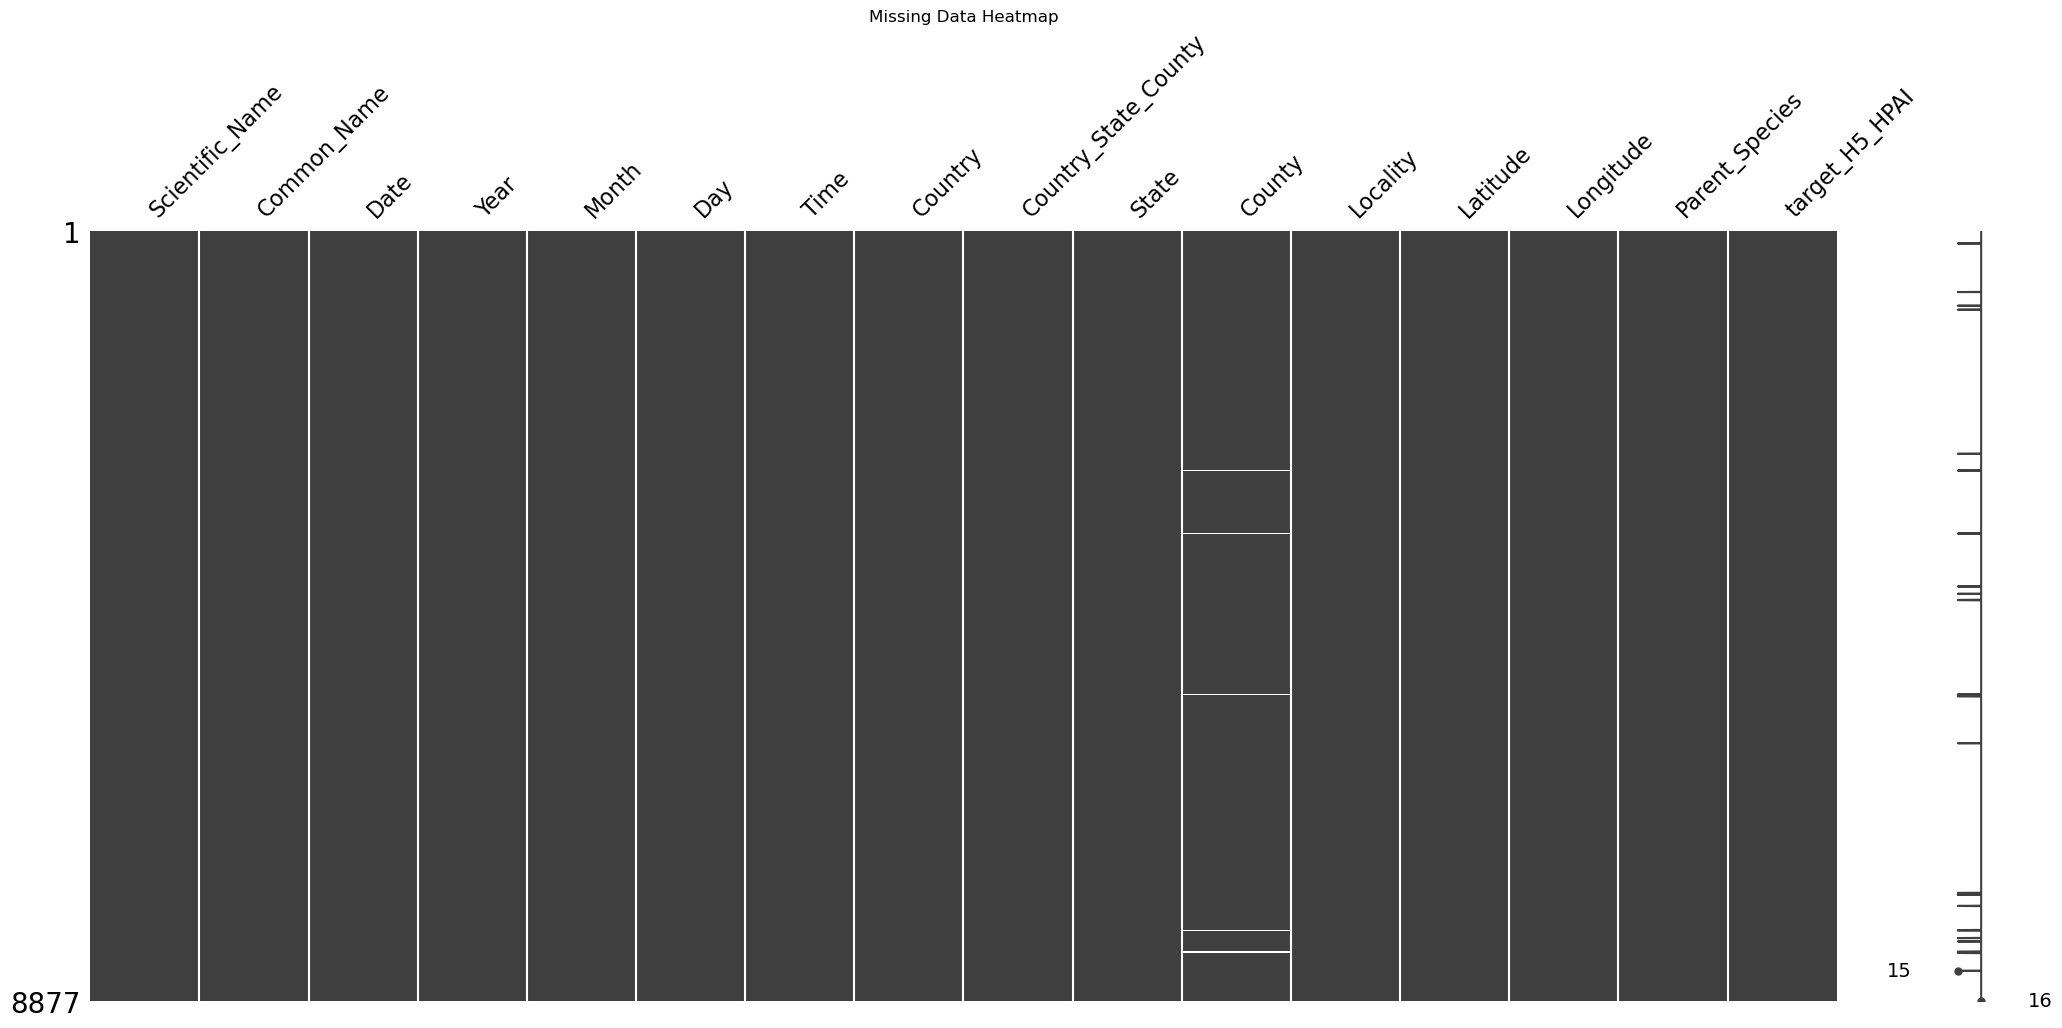

In [42]:
#Visualize missing data
msno.matrix(df)
plt.title('Missing Data Heatmap')
plt.show()

<Figure size 1000x600 with 0 Axes>

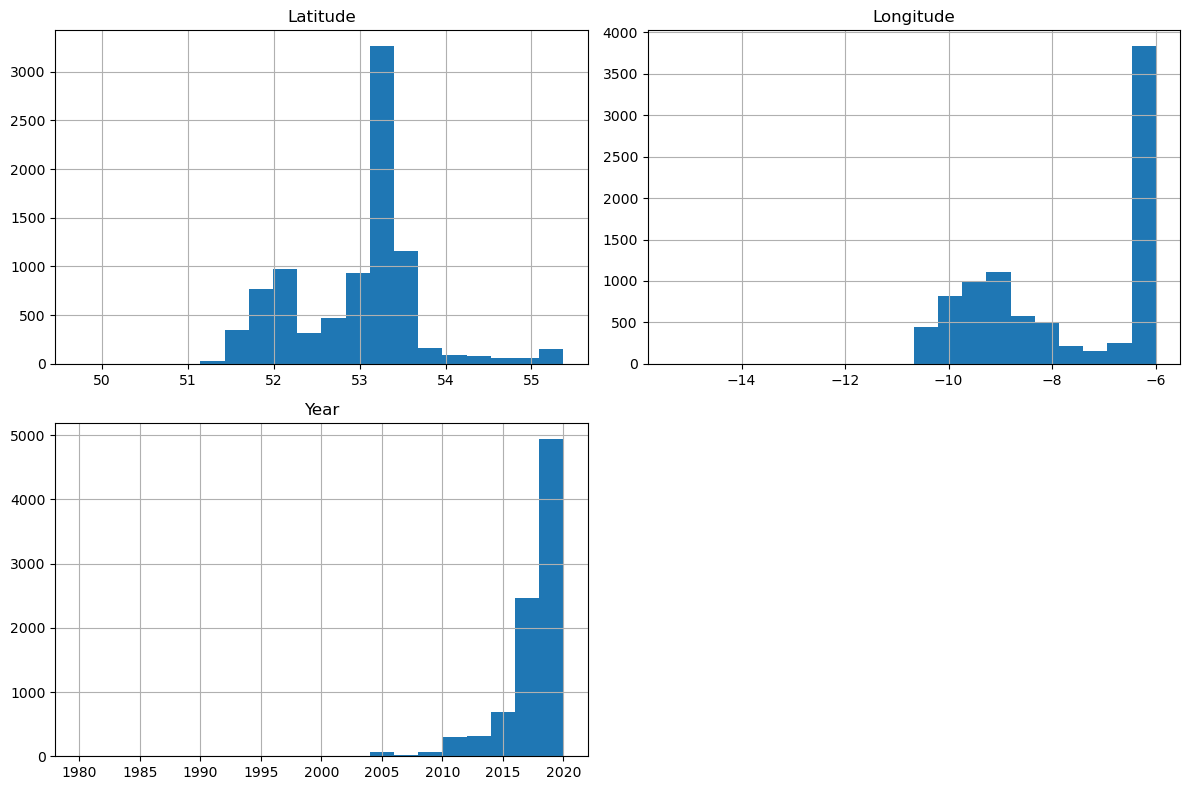

In [44]:
#Distribution of numerical columns (e.g., Latitude, Longitude, Year, etc.)
plt.figure(figsize=(10, 6))
df[['Latitude', 'Longitude', 'Year']].hist(bins=20, figsize=(12, 8))
plt.tight_layout()
plt.show()

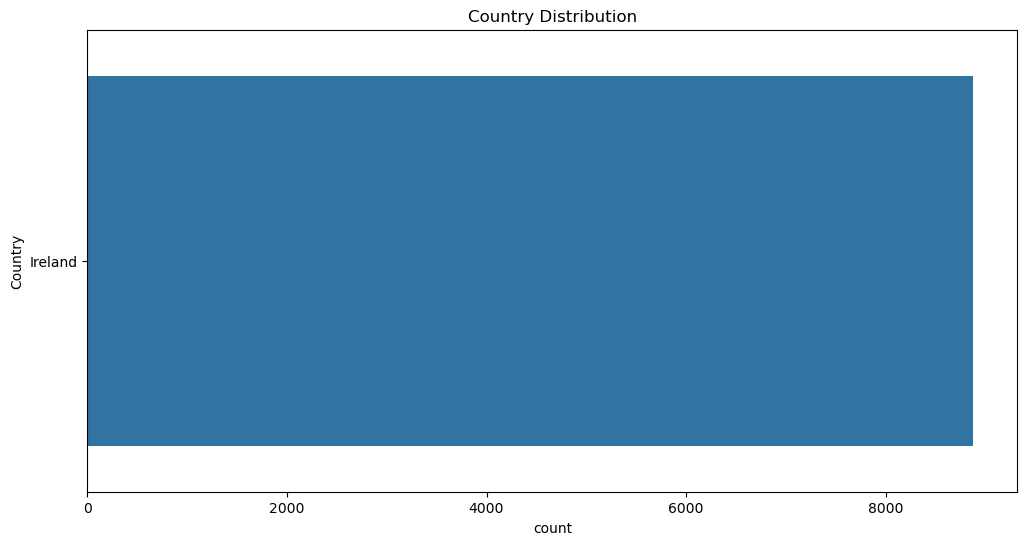

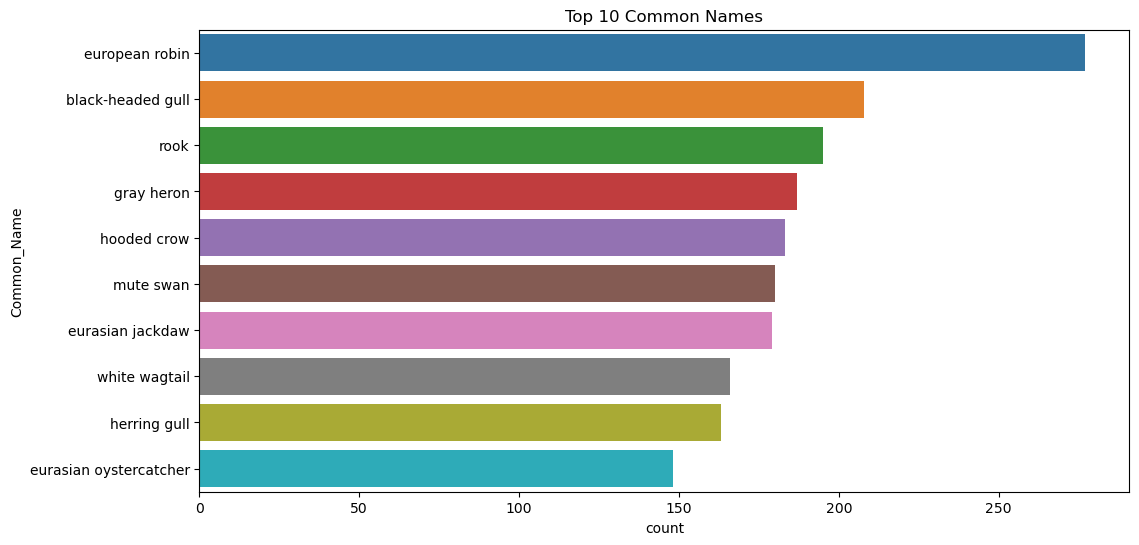

In [46]:
#Analysis of categorical columns
plt.figure(figsize=(12, 6))
sns.countplot(y='Country', data=df, order=df['Country'].value_counts().index)
plt.title('Country Distribution')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(y='Common_Name', data=df, order=df['Common_Name'].value_counts().index[:10])  # Top 10 common names
plt.title('Top 10 Common Names')
plt.show()

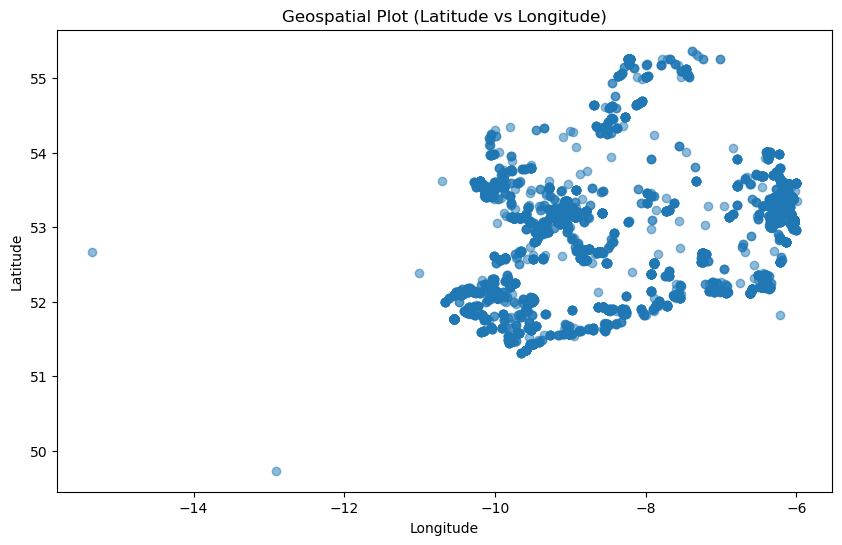

In [48]:
#Geospatial Data Visualization (Scatter Plot of Latitude and Longitude)
plt.figure(figsize=(10, 6))
plt.scatter(df['Longitude'], df['Latitude'], alpha=0.5)
plt.title('Geospatial Plot (Latitude vs Longitude)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

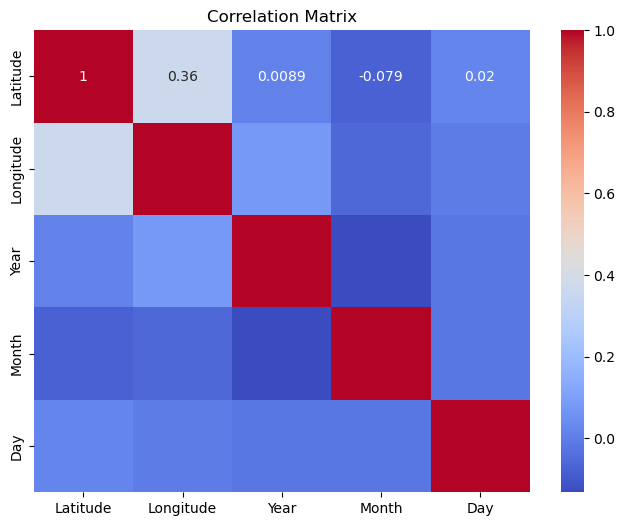

In [50]:
#Correlation Matrix for numeric columns
corr_matrix = df[['Latitude', 'Longitude', 'Year', 'Month', 'Day']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

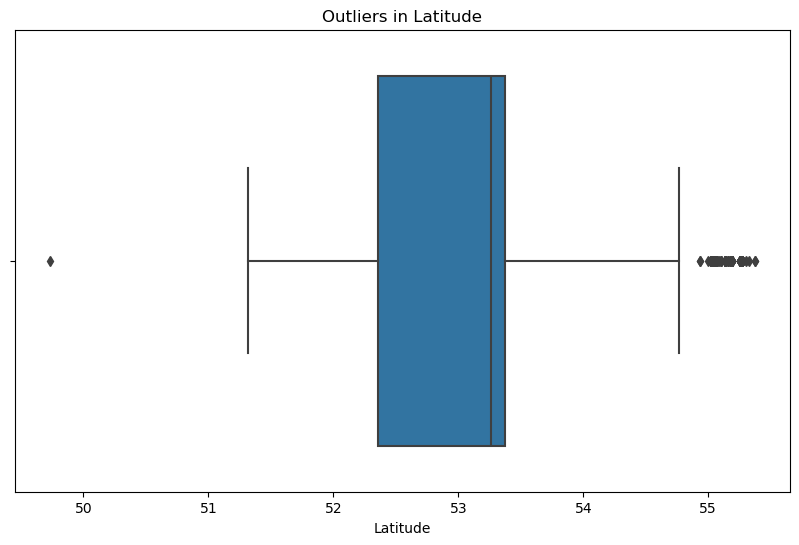

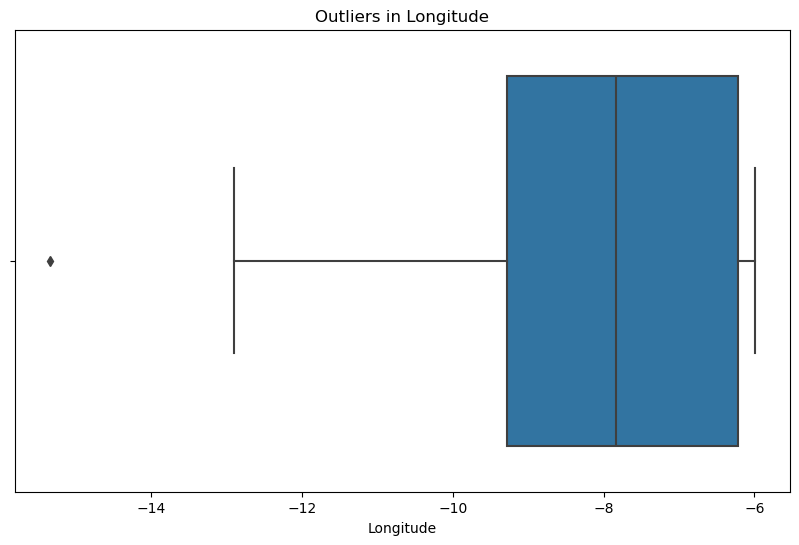

In [52]:
#Outlier detection using box plots
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Latitude'])
plt.title('Outliers in Latitude')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Longitude'])
plt.title('Outliers in Longitude')
plt.show()

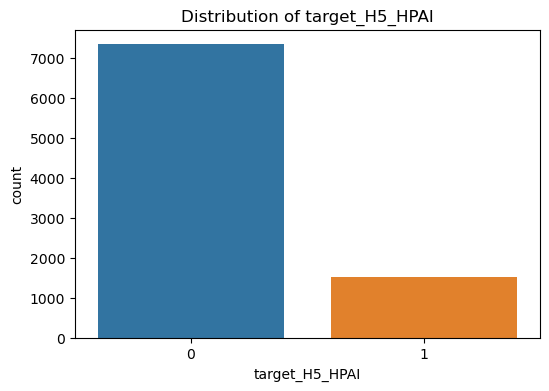

In [54]:
#Target variable analysis: 'target_H5_HPAI'
plt.figure(figsize=(6, 4))
sns.countplot(x='target_H5_HPAI', data=df)
plt.title('Distribution of target_H5_HPAI')
plt.show()

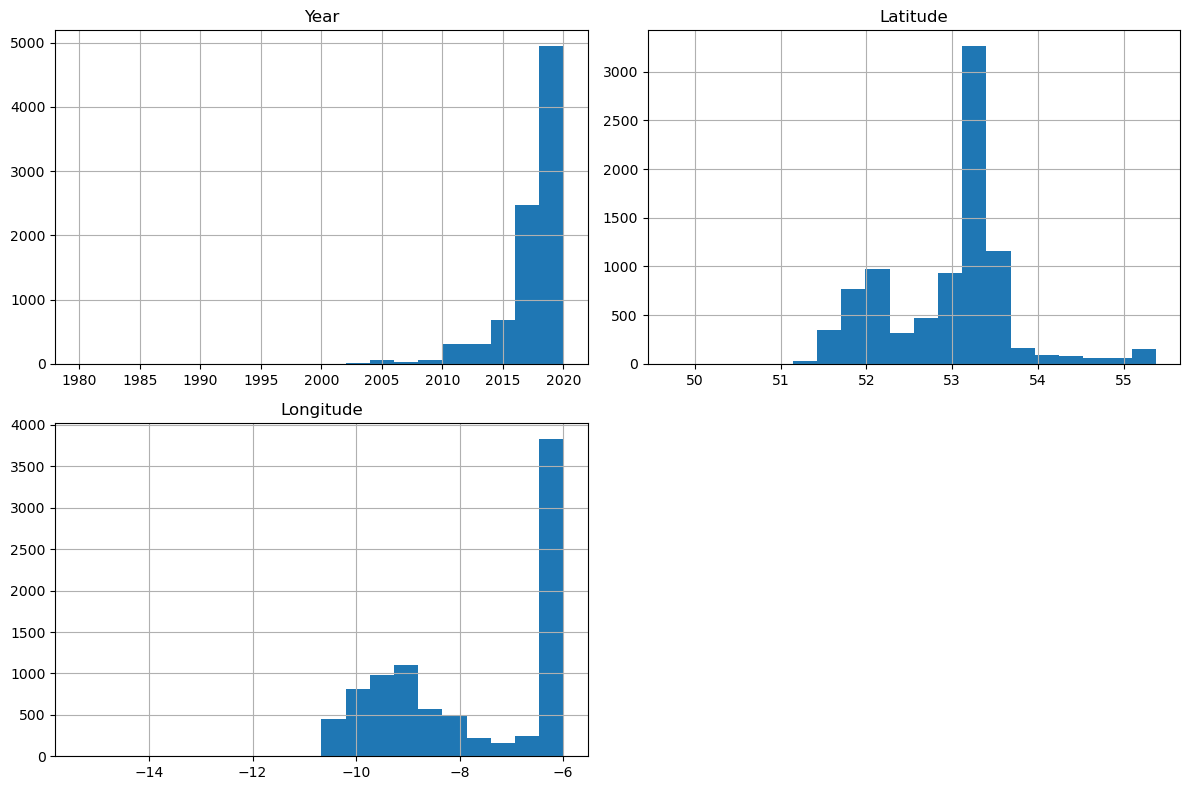

In [58]:
# Histogram for numerical features (Year, Latitude, Longitude)
df[['Year', 'Latitude', 'Longitude']].hist(bins=20, figsize=(12, 8))
plt.tight_layout()
plt.show()

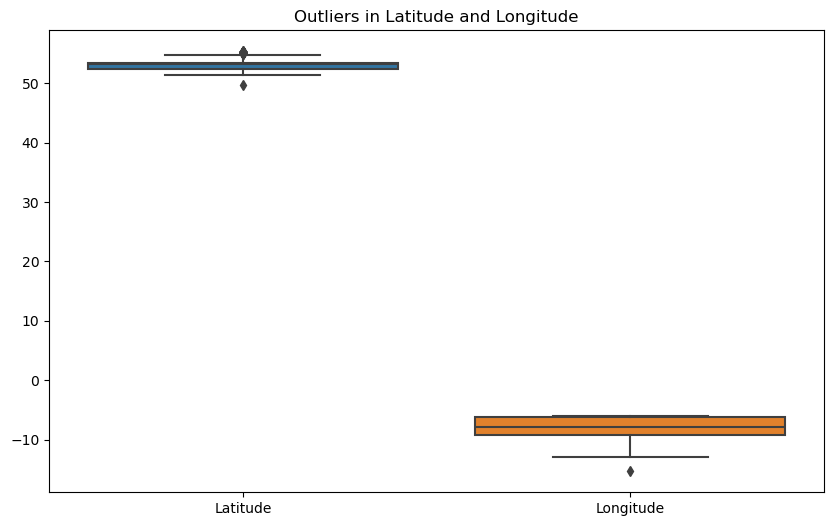

In [60]:
# Boxplots to check for outliers in Latitude and Longitude
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Latitude', 'Longitude']])
plt.title('Outliers in Latitude and Longitude')
plt.show()

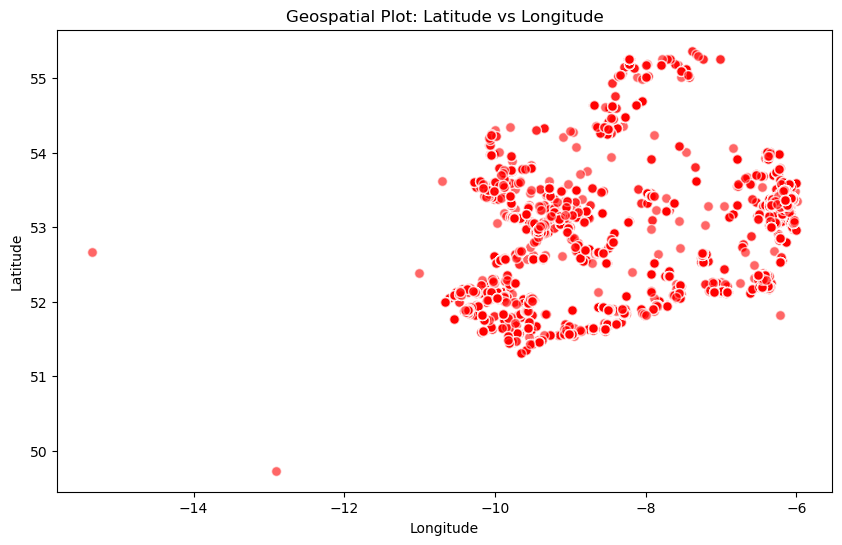

In [62]:
# Scatterplot for Latitude and Longitude (geospatial visualization)
plt.figure(figsize=(10, 6))
plt.scatter(df['Longitude'], df['Latitude'], alpha=0.6, c='red', edgecolors='w', s=50)
plt.title('Geospatial Plot: Latitude vs Longitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

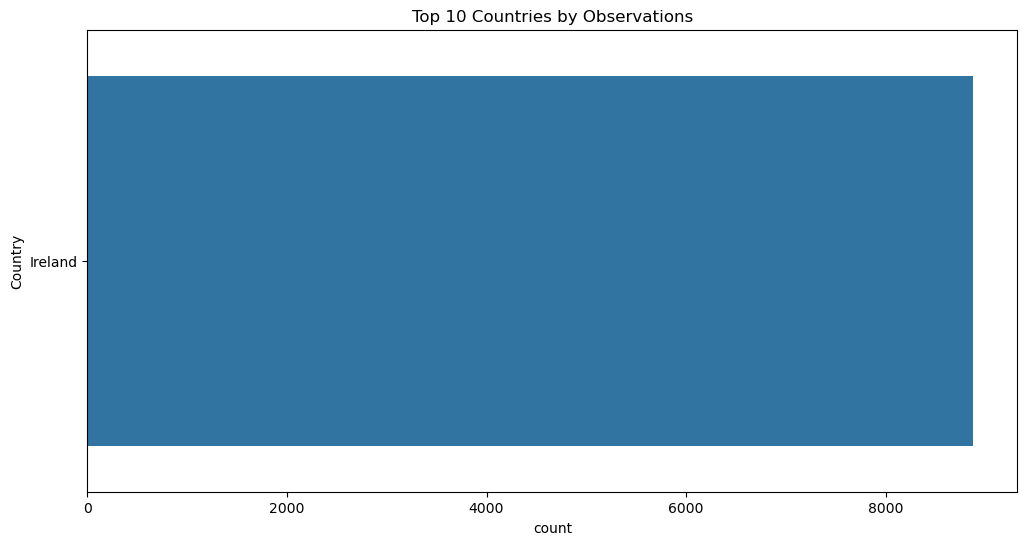

In [64]:
# Distribution of 'Country'
plt.figure(figsize=(12, 6))
sns.countplot(y='Country', data=df, order=df['Country'].value_counts().index[:10])
plt.title('Top 10 Countries by Observations')
plt.show()

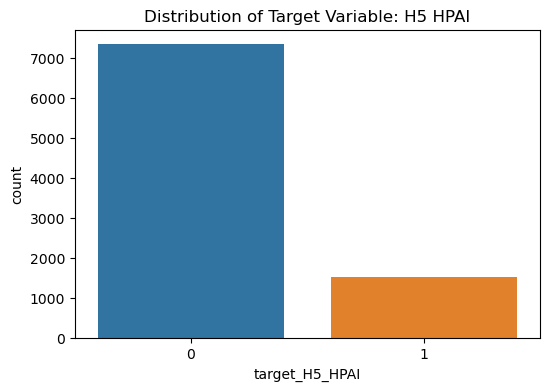

In [66]:
# Distribution of 'target_H5_HPAI' (Target Variable)
plt.figure(figsize=(6, 4))
sns.countplot(x='target_H5_HPAI', data=df)
plt.title('Distribution of Target Variable: H5 HPAI')
plt.show()

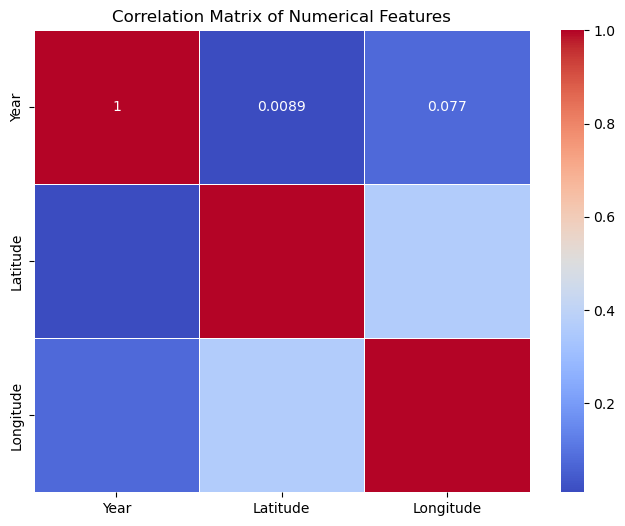

In [68]:
# Correlation matrix heatmap
corr_matrix = df[['Year', 'Latitude', 'Longitude']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [72]:
# Hypothesis: Does the average latitude differ between countries with H5 HPAI and without it?

# Grouping by 'target_H5_HPAI'
group_h5 = df[df['target_H5_HPAI'] == 'Yes']['Latitude']
group_no_h5 = df[df['target_H5_HPAI'] == 'No']['Latitude']

# Perform independent t-test
t_stat, p_val = stats.ttest_ind(group_h5, group_no_h5, nan_policy='omit')

print(f"T-test: t-statistic = {t_stat}, p-value = {p_val}")
if p_val < 0.05:
    print("There is a significant difference in the average Latitude between the groups.")
else:
    print("There is no significant difference in the average Latitude between the groups.")

T-test: t-statistic = nan, p-value = nan
There is no significant difference in the average Latitude between the groups.


In [74]:
# Chi-square test of independence: Are 'Country' and 'target_H5_HPAI' related?

# Create a contingency table
contingency_table = pd.crosstab(df['Country'], df['target_H5_HPAI'])

# Perform the chi-square test
chi2_stat, p_val, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-square test: Chi2-statistic = {chi2_stat}, p-value = {p_val}")
if p_val < 0.05:
    print("There is a significant association between 'Country' and 'target_H5_HPAI'.")
else:
    print("There is no significant association between 'Country' and 'target_H5_HPAI'.")

Chi-square test: Chi2-statistic = 0.0, p-value = 1.0
There is no significant association between 'Country' and 'target_H5_HPAI'.


In [80]:
# Hypothesis: Does the average latitude differ across countries?

# Perform ANOVA
anova_results = stats.f_oneway(
    df[df['Country'] == 'Country1']['Latitude'],
    df[df['Country'] == 'Country2']['Latitude'],
    df[df['Country'] == 'Country3']['Latitude']
    # Add more countries as needed
)

print(f"ANOVA: F-statistic = {anova_results.statistic}, p-value = {anova_results.pvalue}")
if anova_results.pvalue < 0.05:
    print("There is a significant difference in the average Latitude across countries.")
else:
    print("There is no significant difference in the average Latitude across countries.")


ANOVA: F-statistic = nan, p-value = nan
There is no significant difference in the average Latitude across countries.


In [78]:
# Pearson correlation test: Is there a correlation between Latitude and Longitude?
corr_stat, p_val = stats.pearsonr(df['Latitude'], df['Longitude'])

print(f"Pearson Correlation: Correlation coefficient = {corr_stat}, p-value = {p_val}")
if p_val < 0.05:
    print("There is a significant correlation between Latitude and Longitude.")
else:
    print("There is no significant correlation between Latitude and Longitude.")


Pearson Correlation: Correlation coefficient = 0.36422849505675703, p-value = 1.1917351952618658e-276
There is a significant correlation between Latitude and Longitude.
